In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des deux datasets
df_conso = pd.read_csv("../donnees/consommation-annuelle-d-electricite-et-gaz-par-departement.csv", sep=';', low_memory=False)
df_dpe = pd.read_csv("../donnees/dpe_data.csv", low_memory=False)

# Affichage rapide des informations sur les datasets
print(df_conso.info())
print(df_dpe.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104086 entries, 0 to 104085
Data columns (total 42 columns):
 #   Column                                                                      Non-Null Count   Dtype  
---  ------                                                                      --------------   -----  
 0   OPERATEUR                                                                   104086 non-null  object 
 1   FILIERE                                                                     104086 non-null  object 
 2   Année                                                                       104086 non-null  int64  
 3   Code Département                                                            104086 non-null  object 
 4   Nom Département                                                             104086 non-null  object 
 5   Code Région                                                                 104086 non-null  int64  
 6   Nom Région                          

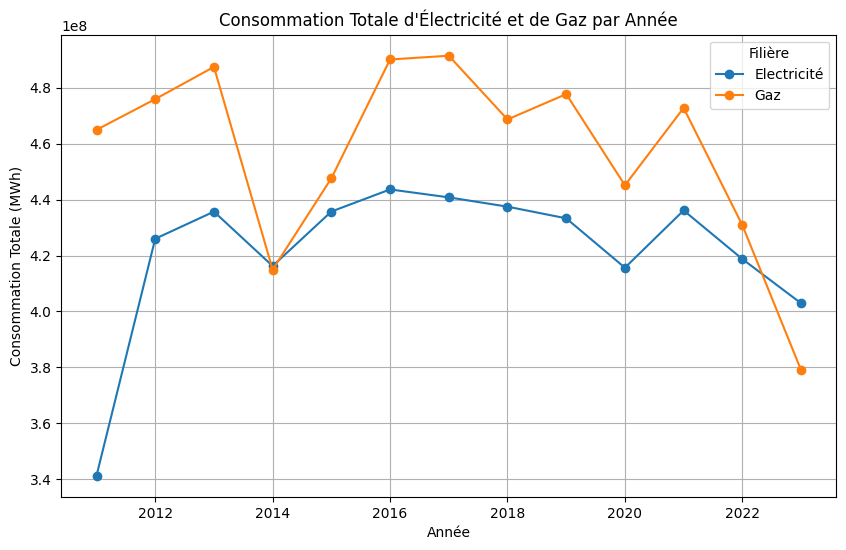

In [3]:
# Agrégation des données par année et type d'énergie
df_conso_grouped = df_conso.groupby(['Année', 'FILIERE'])['Conso totale (MWh)'].sum().unstack()

# Tracé du graphique linéaire empilé
df_conso_grouped.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Consommation Totale d\'Électricité et de Gaz par Année')
plt.xlabel('Année')
plt.ylabel('Consommation Totale (MWh)')
plt.legend(title='Filière')
plt.grid(True)
plt.show()


Le graphique montre une comparaison de la consommation totale d'électricité et de gaz par année. Observons les points suivants pour discussion :

Tendances Générales :

Une baisse marquée en 2022 pour les deux filières. Il serait intéressant d'explorer si cela est dû à des politiques, à une météo particulière, ou à des changements dans le comportement des consommateurs.
Les années 2014 et 2016 semblent être des périodes de variations importantes, avec une baisse soudaine du gaz en 2014 et une montée rapide ensuite.
Différences entre Filières :

Le gaz semble globalement plus consommé que l’électricité sur la période, mais les deux suivent des tendances similaires après 2014.

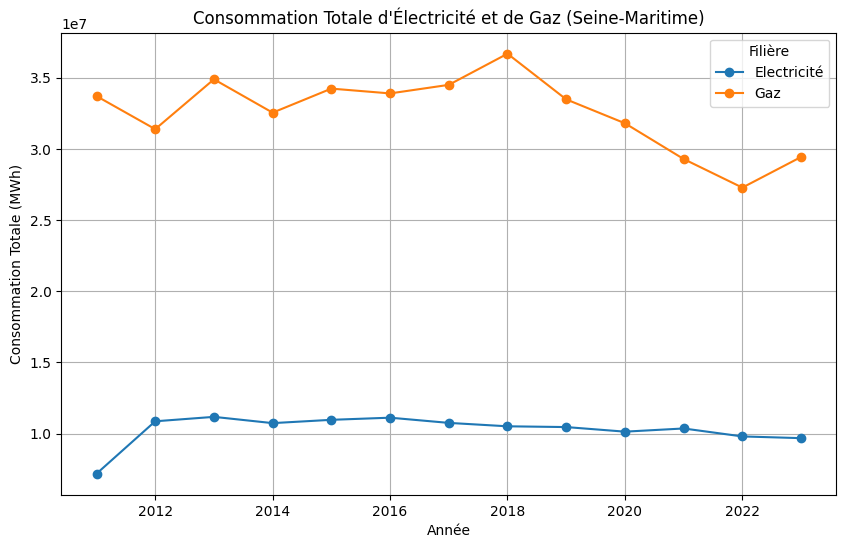

In [4]:
# Filtrer les données pour le département de la Seine-Maritime
df_conso_seine_maritime = df_conso[df_conso['Nom Département'] == 'Seine-Maritime']

# Agrégation des données par année et filière
df_conso_grouped_seine_maritime = df_conso_seine_maritime.groupby(['Année', 'FILIERE'])['Conso totale (MWh)'].sum().unstack()

# Tracé du graphique linéaire
df_conso_grouped_seine_maritime.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Consommation Totale d\'Électricité et de Gaz (Seine-Maritime)')
plt.xlabel('Année')
plt.ylabel('Consommation Totale (MWh)')
plt.legend(title='Filière')
plt.grid(True)
plt.show()


Ce graphique montre les tendances spécifiques à la Seine-Maritime pour la consommation d'électricité et de gaz. Voici quelques observations à discuter :

Observations :
Gaz :

La consommation de gaz est nettement plus élevée que celle de l'électricité.
Une baisse progressive est visible après un pic autour de 2018, ce qui pourrait indiquer un impact des politiques énergétiques ou des évolutions dans l'utilisation des énergies fossiles.
Électricité :

La consommation d'électricité reste relativement stable sur la période, avec une très légère variation. Cela pourrait indiquer une saturation ou une constance dans les habitudes des utilisateurs.
Évolution comparée :

La décroissance du gaz à partir de 2018 contraste avec la relative stabilité de l'électricité. Cela pourrait refléter des efforts de transition énergétique (par exemple, une réduction de l'utilisation du gaz au profit d'autres énergies).
Taux de Dépendance :

La forte domination du gaz dans la consommation énergétique est un point clé à analyser pour le département. Une transition énergétique efficace pourrait viser à réduire cette dépendance.


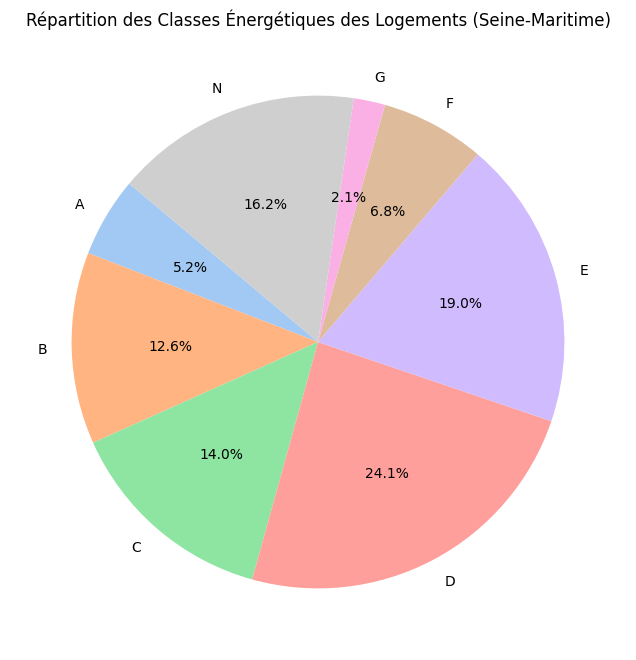

In [8]:
# Filtrer les données pour la Seine-Maritime
df_dpe_seine_maritime = df_dpe[df_dpe['tv016_departement_code'] == '76']

# Comptage des classes énergétiques
classe_counts = df_dpe_seine_maritime['classe_consommation_energie'].value_counts().sort_index()

# Tracé du diagramme circulaire
plt.figure(figsize=(8, 8))
classe_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Répartition des Classes Énergétiques des Logements (Seine-Maritime)')
plt.ylabel('')
plt.show()


Le graphique montre la répartition des classes énergétiques (A à G et autres) pour les logements en Seine-Maritime. Voici quelques observations :

Observations :

Classe dominante :

La classe D (24.1%) est la plus fréquente, suivie des classes E (19.0%) et C (14.0%).
Ces trois classes représentent la majorité des logements

Classes énergivores :

Les classes F (6.8%) et G (2.1%) représentent un risque énergétique important. Les rénovations devraient cibler ces catégories en priorité.

Classes performantes :

Les classes A et B, représentant seulement 5.2% et 12.6%, montrent qu'il y a encore un travail conséquent à faire pour améliorer l'efficacité énergétique des logements.

Nombre total d'entrées après filtrage : 193061
     surface_thermique_lot  consommation_energie
28                   31.74                243.74
140                 115.00                299.81
208                  61.80                251.07
318                 100.00                293.00
398                 300.00                 33.93


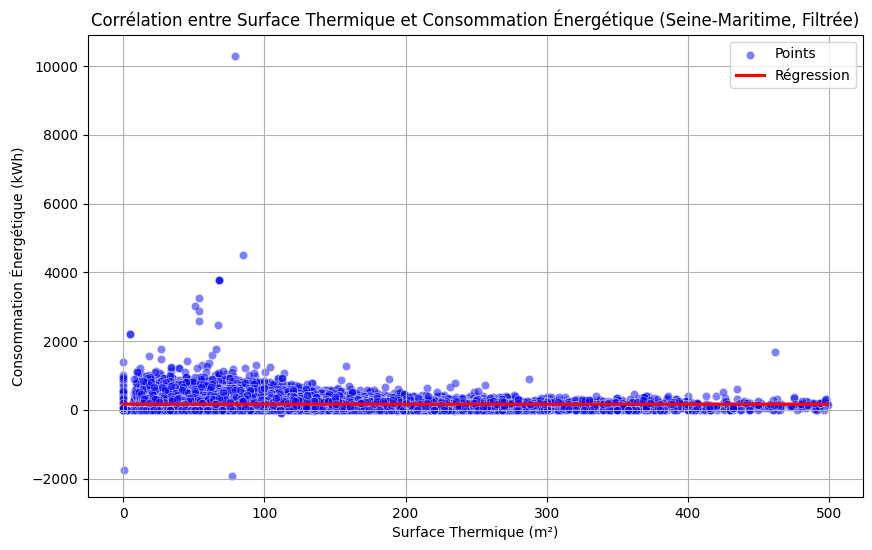

In [12]:
# Filtrer pour la Seine-Maritime (département 76)
df_dpe_seine_maritime = df_dpe[df_dpe['tv016_departement_code'] == '76']

# Suppression des valeurs manquantes pour les colonnes pertinentes
df_dpe_corr = df_dpe_seine_maritime.dropna(subset=['surface_thermique_lot', 'consommation_energie'])

# Suppression des valeurs aberrantes basées sur des seuils
df_filtered = df_dpe_corr[
    (df_dpe_corr['surface_thermique_lot'] < 500) &  # Filtrer les grandes surfaces (>500 m²)
    (df_dpe_corr['consommation_energie'] < 50000)   # Filtrer les consommations extrêmes (>50 000 kWh)
]

# Vérification des données filtrées
print("Nombre total d'entrées après filtrage :", len(df_filtered))
print(df_filtered[['surface_thermique_lot', 'consommation_energie']].head())

# Tracé du scatter plot avec ligne de régression
plt.figure(figsize=(10, 6))
sns.scatterplot(x='surface_thermique_lot', y='consommation_energie', data=df_filtered, alpha=0.5, color='blue', label='Points')
sns.regplot(x='surface_thermique_lot', y='consommation_energie', data=df_filtered, scatter=False, color='red', label='Régression')
plt.title('Corrélation entre Surface Thermique et Consommation Énergétique (Seine-Maritime, Filtrée)')
plt.xlabel('Surface Thermique (m²)')
plt.ylabel('Consommation Énergétique (kWh)')
plt.legend()
plt.grid(True)
plt.show()

Ce graphique se concentre sur une plage filtrée (surface < 500 m²). Voici mes observations :

Tendance globale :

La ligne de régression montre une corrélation très faible entre la surface thermique et la consommation énergétique dans cette plage.
Cela suggère que la consommation ne varie pas proportionnellement à la taille des logements pour ces données spécifiques.

Densité élevée :

La majorité des points est concentrée sous 100 m² de surface thermique et 2000 kWh de consommation.
Cela reflète probablement une prévalence des logements de taille petite ou moyenne dans cette région.

Outliers restants :

Quelques valeurs hors normes, notamment des points avec des consommations élevées (>4000 kWh), sont encore visibles. Bien qu’ils soient rares, ils peuvent affecter la régression.
Anomalies possibles :

La présence de consommations négatives ou nulles mérite une exploration plus approfondie pour vérifier la qualité des données.

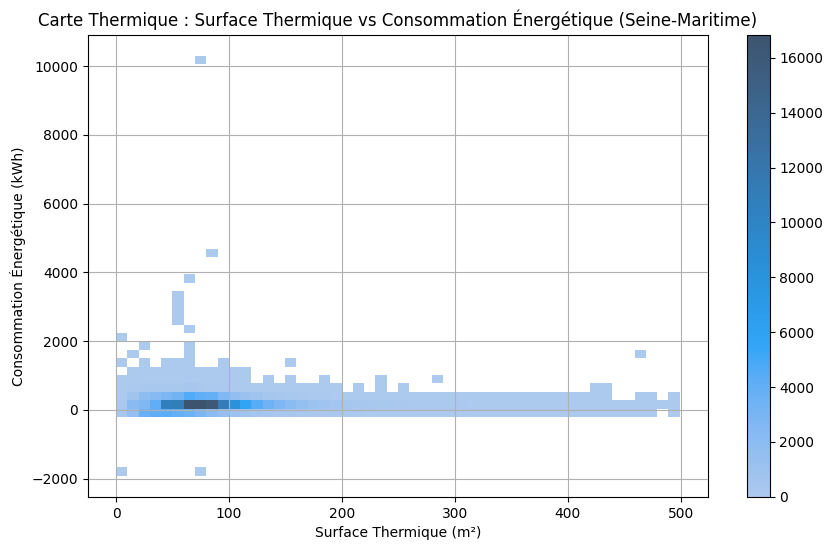

In [15]:
# Heatmap de densité (histogramme bivarié)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='surface_thermique_lot', y='consommation_energie', bins=50, pmax=0.9, cbar=True)
plt.title('Carte Thermique : Surface Thermique vs Consommation Énergétique (Seine-Maritime)')
plt.xlabel('Surface Thermique (m²)')
plt.ylabel('Consommation Énergétique (kWh)')
plt.grid(True)
plt.show()

Ce graphique de type heatmap brute est une excellente représentation de la densité des données

C:\Users\frale\AppData\Local\Temp\ipykernel_5860\4252056145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dpe_seine_maritime['année_dpe'] = pd.to_datetime(df_dpe_seine_maritime['date_etablissement_dpe'], errors='coerce').dt.year


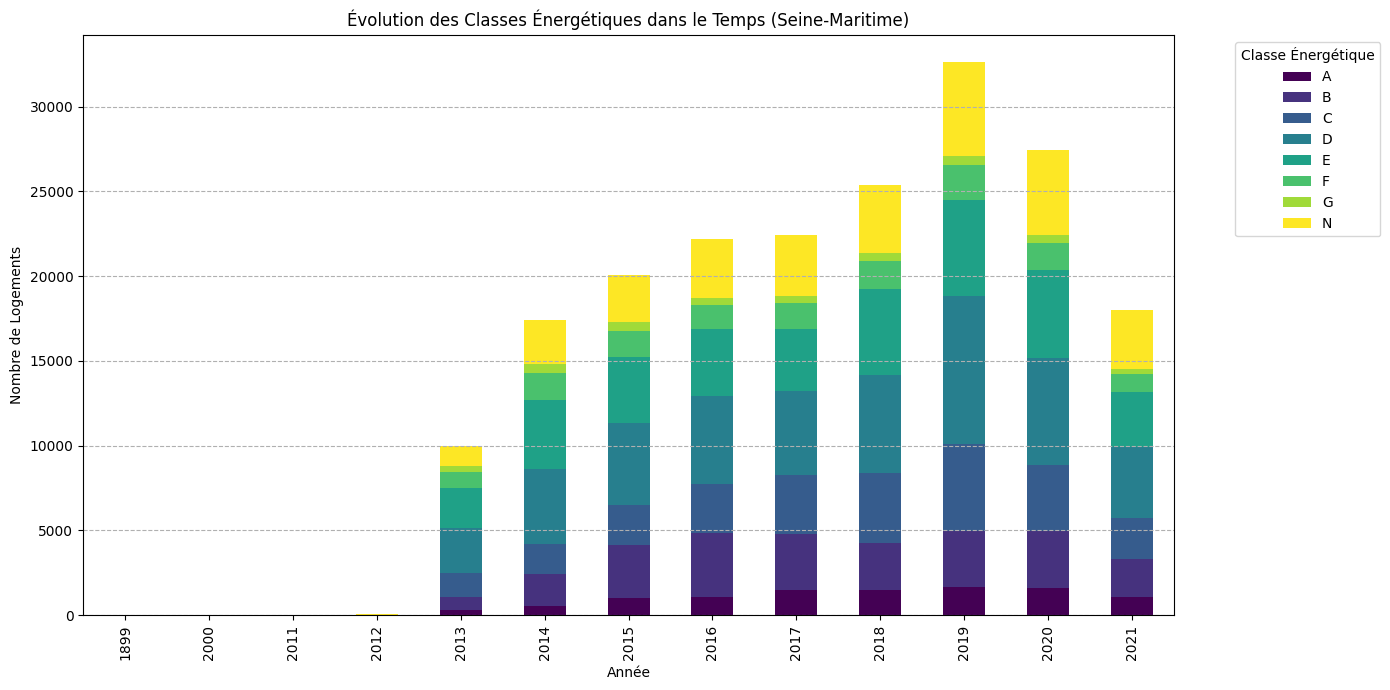

In [17]:
# Conversion de la date d'établissement en année
df_dpe_seine_maritime['année_dpe'] = pd.to_datetime(df_dpe_seine_maritime['date_etablissement_dpe'], errors='coerce').dt.year

# Filtrer les années valides
df_dpe_clean = df_dpe_seine_maritime.dropna(subset=['année_dpe', 'classe_consommation_energie'])

# Agrégation des données par année et classe énergétique
classe_annee = df_dpe_clean.groupby(['année_dpe', 'classe_consommation_energie']).size().unstack().fillna(0)

# Tracé du graphique à barres empilées
classe_annee.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Évolution des Classes Énergétiques dans le Temps (Seine-Maritime)')
plt.xlabel('Année')
plt.ylabel('Nombre de Logements')
plt.legend(title='Classe Énergétique', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.show()


Ce graphique montre l'évolution des classes énergétiques des logements dans le département de la Seine-Maritime au fil des années. Voici les principales observations et pistes d'analyse :

Augmentation globale du nombre de diagnostics :

Le nombre total de logements évalués a augmenté de manière significative après 2015, atteignant un pic en 2019.
La diminution observée en 2021 pourrait être due à des données incomplètes pour cette année ou à un ralentissement des diagnostics.

Tendance des classes énergétiques :

Les classes D et E dominent en nombre sur toute la période.
Les classes énergivores F et G diminuent légèrement proportionnellement, ce qui pourrait indiquer des rénovations ou une amélioration progressive.

Présence de la classe "N" :

La classe "N" (non classée ou inconnue) reste présente, notamment en 2021, ce qui pourrait refléter des anomalies ou un manque de données.

Faible proportion des classes A et B :

Les classes les plus performantes (A et B) restent très minoritaires, montrant que l'amélioration énergétique est encore un défi majeur.